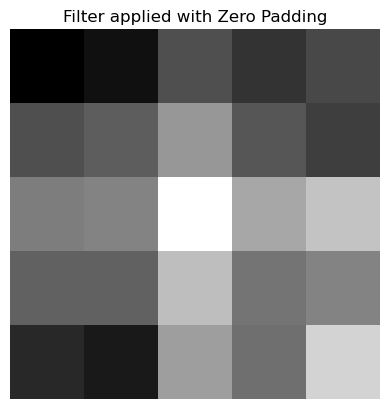

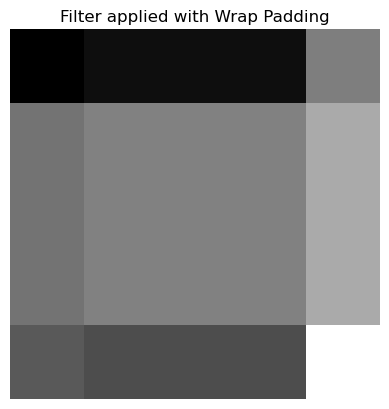

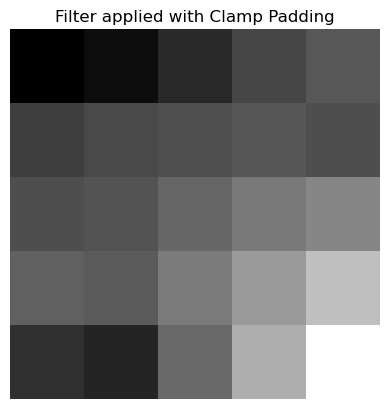

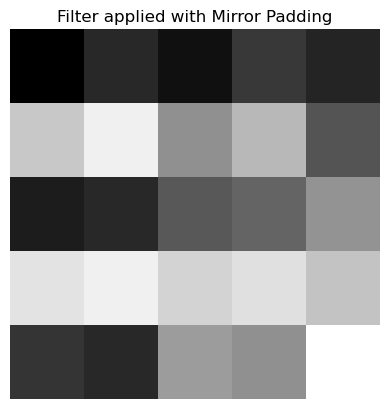

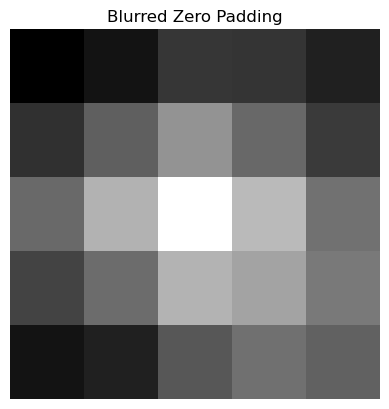

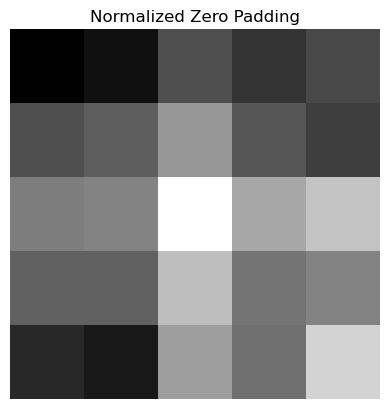

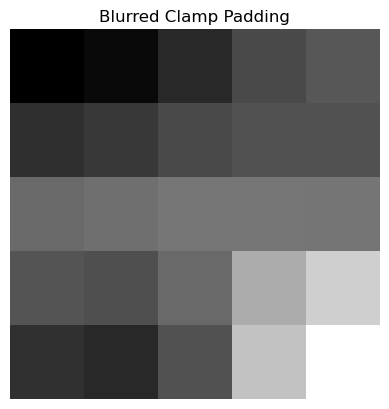

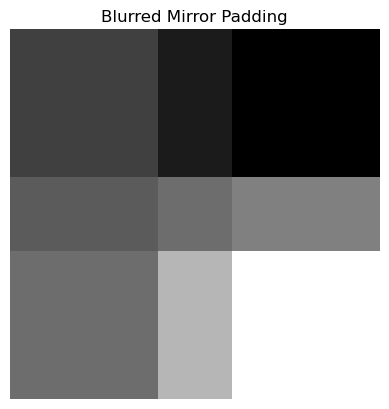

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Simple 3x3 image
image = np.array([
    [50, 80, 120],
    [200, 230, 100],
    [90, 60, 255]
], dtype=np.uint8)

# Simple 3x3 filter (mean filter as an example)
filter_3x3 = np.ones((3, 3)) / 9.0

# Function to apply convolution with a given padding mode
def apply_filter_with_padding(img, pad_mode):
    padded_img = np.pad(img, pad_width=1, mode=pad_mode)
    return cv2.filter2D(padded_img, -1, filter_3x3)

# Plotting function to visualize results
def show_image(title, img):
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Padding strategies
strategies = {
    "Zero Padding": 'constant',  # zero padding
    "Wrap Padding": 'wrap',  # wrap around padding
    "Clamp Padding": 'edge',  # clamp padding
    "Mirror Padding": 'reflect',  # mirror padding
}

# Applying each padding strategy
for strategy, pad_mode in strategies.items():
    padded_img = apply_filter_with_padding(image, pad_mode)
    show_image(f"Filter applied with {strategy}", padded_img)

# Specialized blurred zero padding function
def blurred_zero_padding(img, blur_kernel_size=3):
    padded_img = np.pad(img, pad_width=1, mode='constant')
    blurred_img = cv2.GaussianBlur(padded_img, (blur_kernel_size, blur_kernel_size), 0)
    return blurred_img

# Specialized normalized zero padding function
def normalized_zero_padding(img):
    padded_img = np.pad(img, pad_width=1, mode='constant')
    filter_sum = np.sum(filter_3x3)
    normalized_img = cv2.filter2D(padded_img, -1, filter_3x3) / filter_sum
    return normalized_img

# Specialized blurred clamp padding function
def blurred_clamp_padding(img, blur_kernel_size=3):
    padded_img = np.pad(img, pad_width=1, mode='edge')
    blurred_img = cv2.GaussianBlur(padded_img, (blur_kernel_size, blur_kernel_size), 0)
    return blurred_img

# Specialized blurred mirror padding function
def blurred_mirror_padding(img, blur_kernel_size=3):
    padded_img = np.pad(img, pad_width=1, mode='reflect')
    blurred_img = cv2.GaussianBlur(padded_img, (blur_kernel_size, blur_kernel_size), 0)
    return blurred_img

# Apply and show results for custom paddings
show_image("Blurred Zero Padding", blurred_zero_padding(image))
show_image("Normalized Zero Padding", normalized_zero_padding(image))
show_image("Blurred Clamp Padding", blurred_clamp_padding(image))
show_image("Blurred Mirror Padding", blurred_mirror_padding(image))
